In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=False)
rc("font", family = "serif")
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'
import pymc3 as pm

/home/john/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


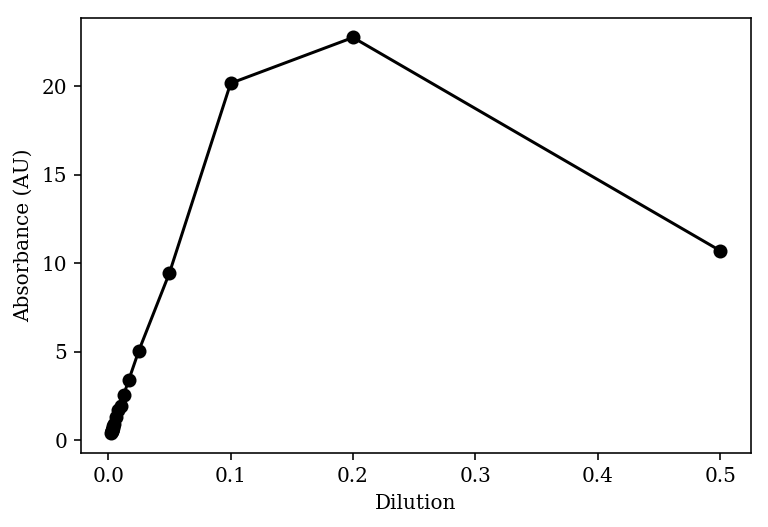

In [2]:
#here are the coefficients for eGFP @ 488 nm
epsilon = 56000. #extinction (per Molar per cm)
mw = 26941.48  #molecular weight (g/mol)


#Dilution factor
D = 1./np.array([
    2,
    5,
    10,
    20,
    40,
    60,
    80,
    100,
    120,
    160,
    200,
    240,
    260,
    300,
    320,
    360,
    400
])

Y = np.array([
    10.71,
    22.76,
    20.17,
    9.45,
    5.06,
    3.38,
    2.54,
    1.92,
    1.68,
    1.28,
    .93,
    .79,
    .68,
    .52,
    .52,
    .56,
    .41
])

nanodrop_error_scale = 0.05

plt.plot(D, Y,'ko-')
plt.xlabel('Dilution')
plt.ylabel('Absorbance (AU)')
plt.show()

In [11]:
with pm.Model() as model:
    c_hat = pm.Normal('c', mu=100,sigma=50)
    df =  pm.HalfNormal('df', sigma=10)
    A_pred = epsilon*c_hat*D/mw
    A = pm.StudentT('A', nu=df, mu=A_pred, sigma=nanodrop_error_scale*A_pred, observed = Y)
    
    trace = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [df, c]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:02<00:00, 3635.35draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff66cdaf748>,
      dtype=object)

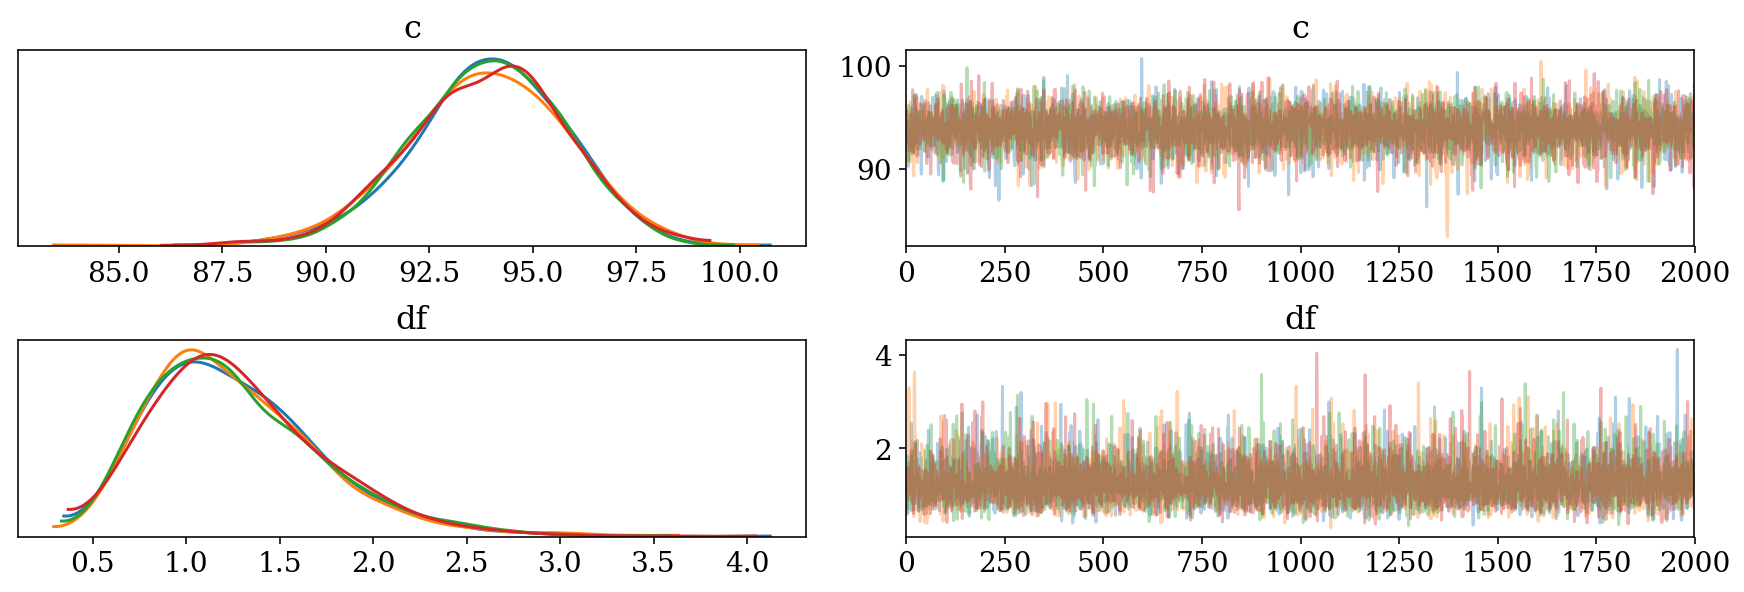

In [4]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff66c4d6e10>,
      dtype=object)

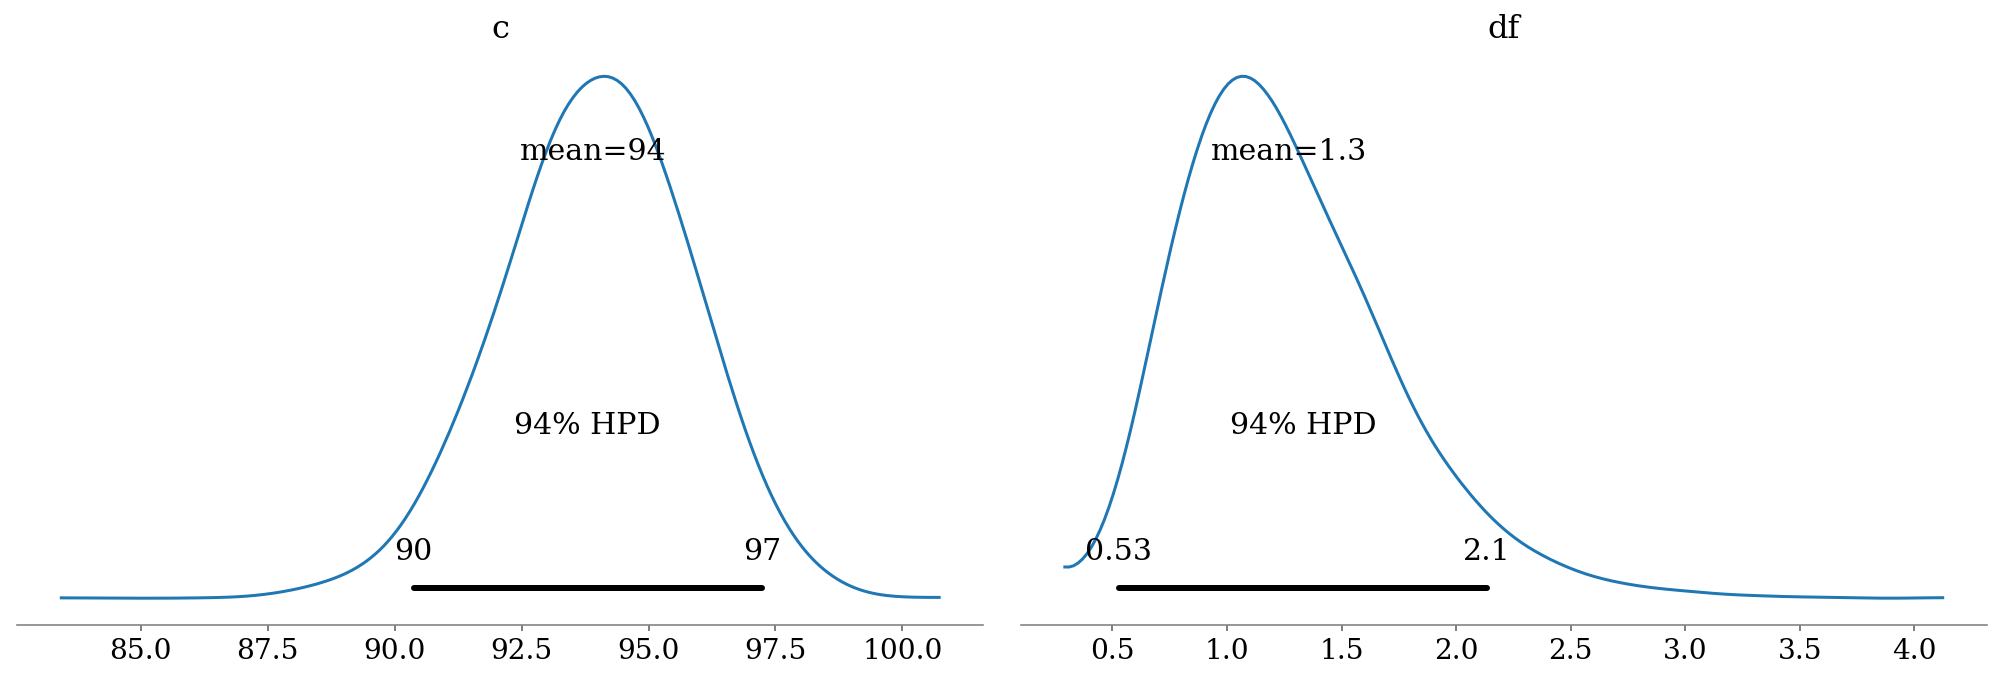

In [10]:
pm.plot_posterior(trace)